# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

saved_lats = []
saved_longs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_longs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#Create city_list df to check cities and coordinates have been grouped.
city_list = pd.DataFrame({'City': cities, 'Latitude': saved_lats,
                           'Longitude': saved_longs})
city_list.head()
                           
                           
                           

Number of cities in the list: 605


,City,Latitude,Longitude
0,cape town,-50.127464,1.420720
1,portland,-54.479507,131.497690
2,olafsvik,65.414823,-27.891755
3,sibolga,-0.706411,97.307982
4,busselton,-38.245341,114.359347


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

query_url = f'{base_url}&units={units}&APPID={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | olafsvik
Processing Record 4 of Set 1 | sibolga
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | andenes
Processing Record 8 of Set 1 | coquimbo
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | erdaojiang
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | la palma
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | vardo
Processing Record 20 of Set 1 | caravelas
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | codrington
Processing Record 23 of Set 1 | vaini
Proce

Processing Record 37 of Set 4 | kavaratti
Processing Record 38 of Set 4 | port blair
Processing Record 39 of Set 4 | nhulunbuy
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | san policarpo
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | bontang
Processing Record 44 of Set 4 | coihaique
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | najran
Processing Record 47 of Set 4 | stephenville
Processing Record 48 of Set 4 | ahuimanu
Processing Record 49 of Set 4 | butaritari
Processing Record 0 of Set 5 | vigrestad
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | taree
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | san andres
Processing Record 6 of Set 5 | tuzha
Processing Record 7 of Set 5 | aljezur
Processing Record 8 of Set 5 | ambon
Processing Record 9 of Set 5 | semporna
Processing Record 10 of Set 5 | ruy barbosa
Process

Processing Record 30 of Set 8 | calera
Processing Record 31 of Set 8 | pandan
Processing Record 32 of Set 8 | maceio
Processing Record 33 of Set 8 | erenhot
Processing Record 34 of Set 8 | vilhena
Processing Record 35 of Set 8 | labuhan
Processing Record 36 of Set 8 | rawson
Processing Record 37 of Set 8 | dien bien
City not found. Skipping...
Processing Record 38 of Set 8 | vaovai
City not found. Skipping...
Processing Record 39 of Set 8 | anito
Processing Record 40 of Set 8 | aykhal
Processing Record 41 of Set 8 | wantagh
Processing Record 42 of Set 8 | derzhavinsk
Processing Record 43 of Set 8 | paderborn
Processing Record 44 of Set 8 | coracora
Processing Record 45 of Set 8 | byron bay
Processing Record 46 of Set 8 | saint-pierre
Processing Record 47 of Set 8 | nara
Processing Record 48 of Set 8 | coahuayana
Processing Record 49 of Set 8 | touros
Processing Record 0 of Set 9 | poum
Processing Record 1 of Set 9 | at-bashi
Processing Record 2 of Set 9 | pemangkat
Processing Record 3 

Processing Record 15 of Set 12 | karaul
City not found. Skipping...
Processing Record 16 of Set 12 | fare
Processing Record 17 of Set 12 | namuac
Processing Record 18 of Set 12 | buraydah
Processing Record 19 of Set 12 | kyra
Processing Record 20 of Set 12 | gizo
Processing Record 21 of Set 12 | vogan
Processing Record 22 of Set 12 | araouane
Processing Record 23 of Set 12 | dingle
Processing Record 24 of Set 12 | hobyo
Processing Record 25 of Set 12 | walvis bay
Processing Record 26 of Set 12 | muisne
Processing Record 27 of Set 12 | maniitsoq
Processing Record 28 of Set 12 | rio pomba
Processing Record 29 of Set 12 | saldanha
Processing Record 30 of Set 12 | obersiggenthal
Processing Record 31 of Set 12 | lima
Processing Record 32 of Set 12 | constitucion
Processing Record 33 of Set 12 | puerto quijarro
Processing Record 34 of Set 12 | meulaboh
Processing Record 35 of Set 12 | yatsuo
Processing Record 36 of Set 12 | raahe
Processing Record 37 of Set 12 | tual
Processing Record 38 of 

In [5]:
city_data

[{'City': 'cape town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 16.73,
  'Humidity': 59,
  'Cloudiness': 0,
  'Wind Speed': 5.66,
  'Country': 'ZA',
  'Date': 1681235184},
 {'City': 'portland',
  'Lat': 45.5234,
  'Lng': -122.6762,
  'Max Temp': 8.03,
  'Humidity': 90,
  'Cloudiness': 75,
  'Wind Speed': 4.92,
  'Country': 'US',
  'Date': 1681235052},
 {'City': 'olafsvik',
  'Lat': 64.8945,
  'Lng': -23.7142,
  'Max Temp': 2.94,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 3.3,
  'Country': 'IS',
  'Date': 1681235256},
 {'City': 'sibolga',
  'Lat': 1.7427,
  'Lng': 98.7792,
  'Max Temp': 24.56,
  'Humidity': 91,
  'Cloudiness': 99,
  'Wind Speed': 0.78,
  'Country': 'ID',
  'Date': 1681235256},
 {'City': 'busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 16.18,
  'Humidity': 80,
  'Cloudiness': 30,
  'Wind Speed': 3.09,
  'Country': 'AU',
  'Date': 1681235256},
 {'City': 'san quintin',
  'Lat': 30.4833,
  'Lng': -115.95,
  'Max Temp': 17.88,
  'Humidity'

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df["Date"].max(), unit='s').date()

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
554,kyzyl-suu,42.3414,78.0056,4.69,77,98,2.28,KG,2023-04-11
555,manzanillo,20.3433,-77.1167,30.88,47,8,3.45,CU,2023-04-11
556,rivadavia,-33.1905,-68.4608,26.91,41,16,5.34,AR,2023-04-11
557,mankono,8.0586,-6.1897,33.36,32,99,1.75,CI,2023-04-11
558,vaitape,-16.5167,-151.7500,27.53,73,99,2.72,PF,2023-04-11


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,16.73,59,0,5.66,ZA,2023-04-11
1,portland,45.5234,-122.6762,8.03,90,75,4.92,US,2023-04-11
2,olafsvik,64.8945,-23.7142,2.94,95,100,3.30,IS,2023-04-11
3,sibolga,1.7427,98.7792,24.56,91,99,0.78,ID,2023-04-11
4,busselton,-33.6500,115.3333,16.18,80,30,3.09,AU,2023-04-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

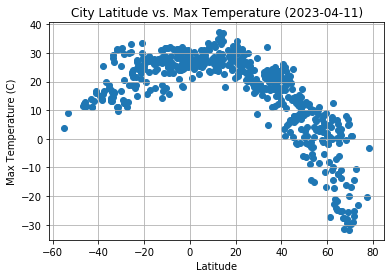

In [10]:
# Build scatter plot for latitude vs. temperature
date = city_data_df["Date"][0]

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

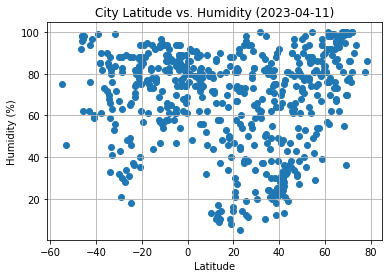

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

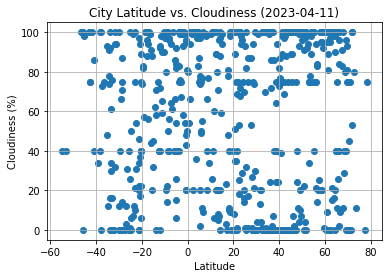

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

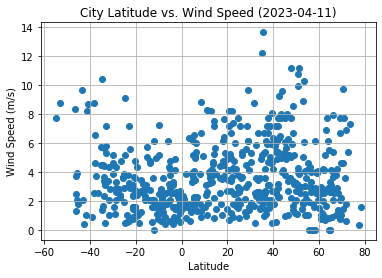

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, line_x, line_y):
    plt.scatter(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(f'y= {round(slope, 2)}x + {round(intercept, 2)}', (line_x, line_y), fontsize=15, color='r')
    print(f"The r-value is {rvalue**2}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,portland,45.5234,-122.6762,8.03,90,75,4.92,US,2023-04-11
2,olafsvik,64.8945,-23.7142,2.94,95,100,3.30,IS,2023-04-11
3,sibolga,1.7427,98.7792,24.56,91,99,0.78,ID,2023-04-11
5,san quintin,30.4833,-115.9500,17.88,66,4,4.67,MX,2023-04-11
6,andenes,69.3143,16.1194,4.99,70,0,2.06,NO,2023-04-11


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,16.73,59,0,5.66,ZA,2023-04-11
4,busselton,-33.6500,115.3333,16.18,80,30,3.09,AU,2023-04-11
7,coquimbo,-29.9533,-71.3436,16.85,88,100,4.63,CL,2023-04-11
9,avarua,-21.2078,-159.7750,24.03,78,20,1.54,CK,2023-04-11
10,souillac,-20.5167,57.5167,25.21,88,40,1.54,MU,2023-04-11


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7145589827990669


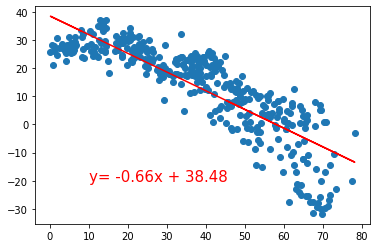

In [34]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 10, -20)


The r-value is 0.4445887875548633


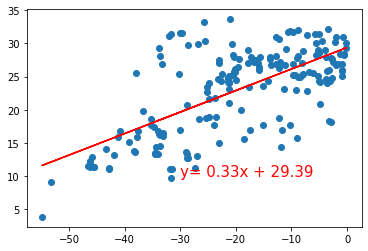

In [35]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -30, 10)

**Discussion about the linear relationship:** When plotting the relationship between latitude and temperature, these factors seem to marry more closely together in the northern hemisphere than the southern. This relationship could be attributable to the amount of land mass in the northern hemisphere vs. southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.06676762754076086


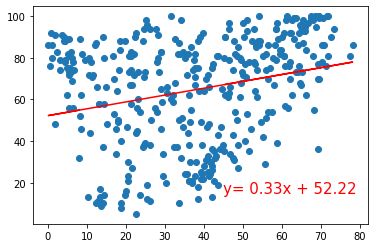

In [36]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 45, 15)

The r-value is 0.007667867542531349


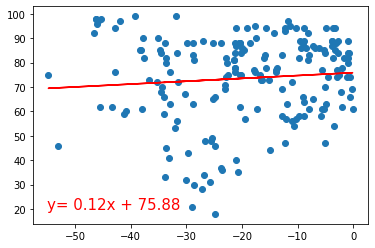

In [45]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -55, 20)

**Discussion about the linear relationship:** When plotting the relationship between latitude and humidity, there does not seem to be that strong of a correlation between these two factors. The r-values indicate that other factors are at play when it comes a location's humidity level.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0007486832057409126


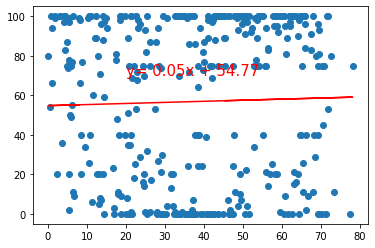

In [38]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 20, 70)

The r-value is 0.018613198172363794


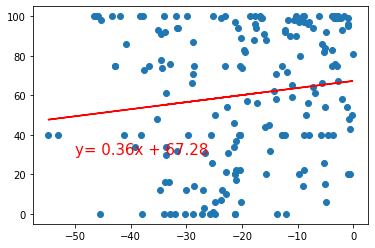

In [39]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -50, 30)

**Discussion about the linear relationship:** Cloudiness very clearly is not represented as a function of latitude. This makes sense because of the different wind patterns throughout the globe. The globe's rotation causes clouds to move and shift along lines other than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is 0.14425290861985435


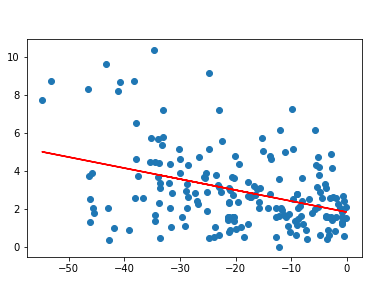

In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -30, 12)

**Discussion about the linear relationship:** Like with some of the other scatter polts, there is not a strong relationship between wind speed and latitude. In the end, it makes sense that the strong link would be between latitude and max temp because latitude determines the angle of sunlight, with the equator receiving the most consistent level of sun throughout the day and year.